In [0]:
!git clone https://github.com/openaifab/suicide_lstm.git

Cloning into 'suicide_lstm'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 0), reused 16 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [0]:
%cd suicide_lstm

/content/suicide_lstm


In [0]:
%pwd

'/content/suicide_lstm'

In [0]:
import pandas as pd
import jieba.posseg as pseg
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import os

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
def jieba_tokenizer(text):
    words = pseg.cut(text)
    return ' '.join([
        word for word, flag in words if flag != 'x' and flag!='y'and word!='丶'] )

pos_train_filename = 'source/normal.txt'
neg_train_filename = 'source/die.txt'

col_name=['content']

In [0]:
pos_train_df =  pd.read_table(pos_train_filename,names=col_name)
neg_train_df =  pd.read_table(neg_train_filename,names=col_name)

#make positive data less
pos_train_df = pos_train_df[:600]
######

print(pos_train_df)
print(neg_train_df)

                                               content
0    预计标普期货再下跌5个指数点，市场情绪将有回归到平和状态，现在的标普下跌是将极端乐观的市场情...
1    #2017四川公安舟船演练#乘风破浪，奋勇争先，为了肩头的使命与担当，为了警察的职责与荣耀。...
2    会有签售呀！本周日下午1:30，在中关村言几又书店！！！！你就可以现场看到我有多胖了！！！ ...
3       【活动】“博物馆里的非遗美术课”5-6月份活动回顾。http://t.cn/R5NeXW4 
4    【全国高校外卖订单量30强出炉 你平时都点啥[围观]】近日，某在线外卖订餐平台对全国高校外卖...
..                                                 ...
595  【74岁老太替儿还债，挑60斤菜进城卖[悲伤]】山东济南74岁老人赵殿香，每天四五点起床，挑...
596  #北京事儿#【[祈祷]】@小镚儿奴才 ：早起坐车上班在东四环辅路，看见一个流浪汉衣衫褴褛，把...
597                        北京街拍更新，小小复古斑点红裙，freestyle！ 
598  #每日震知道# #地震科普# 震今召、震名人，希望大家都来关注，转起来！#北京政在说# @中...
599                            #北京夜聊#说说你是因为什么而留在北京的…… 

[600 rows x 1 columns]
                                               content
0                                     我丶不配丶结束饭。我好累啊。饭。
1             钓鱼的小橘猫很多时候，我能感觉到自己没有未来，就像一切都会在下一秒结束，包括生命
2                                 大乔617走饭我好想死，但。。。唉╯﹏╰
3                                   我自己都放弃了自己 更不要说是别人了
4    我告诉自己 还能撑住 但我也不知道能撑到什么时候 我准备搬家了 我要换个

In [0]:
pos_train_df['content_tokenized'] = pos_train_df.loc[:, 'content'].apply(jieba_tokenizer)
neg_train_df['content_tokenized'] = neg_train_df.loc[:, 'content'].apply(jieba_tokenizer)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.919 seconds.
Prefix dict has been built successfully.


In [0]:
print(pos_train_df['content_tokenized'])
print(neg_train_df['content_tokenized'])
print("\n total x_train:", len(pos_train_df)+len(neg_train_df))

0      预计 标普 期货 再 下跌 5 个 指数 点 市场 情绪 将 有 回归 到 平和 状态 现在...
1      2017 四川 公安 舟船 演练 乘风破浪 奋勇争先 为了 肩头 的 使命 与 担当 为了 ...
2      会 有 签售 本周 日 下午 30 在 中关村 言 几 又 书店 你 就 可以 现场 看到 ...
3        活动 博物馆 里 的 非 遗 美术课 月份 活动 回顾 http t . cn R5NeXW4
4      全国 高校 外卖 订单 量 30 强 出炉 你 平时 都 点 啥 围观 近日 某 在线 外卖...
                             ...                        
595    74 岁 老太 替 儿 还债 挑 60 斤 菜 进城 卖 悲伤 山东 济南 74 岁 老人 ...
596    北京 事儿 祈祷 小镚儿 奴才 早起 坐车 上班 在 东四环 辅路 看见 一个 流浪汉 衣衫...
597                      北京 街 拍 更新 小小 复古 斑点 红裙 freestyle
598    每日 震 知道 地震 科普 震今 召 震 名人 希望 大家 都 来 关注 转 起来 北京 政...
599                        北京 夜 聊 说 说 你 是因为 什么 而 留在 北京 的
Name: content_tokenized, Length: 600, dtype: object
0                                       我 不配 结束 饭 我 好累 饭
1      钓鱼 的 小橘 猫 很多 时候 我 能 感觉 到 自己 没有 未来 就 像 一切 都 会 在...
2                                  大乔 617 走饭 我 好 想 死 但 唉
3                           我 自己 都 放弃 了 自己 更 不要 说 是 别人 了
4      我 告诉 自己 还 能 撑住 但 我 也 不 知道 能撑 到 什么 时候 我 准备 搬家 了...
                             ...    

In [0]:
pos_train_df['label'] = 0
neg_train_df['label'] = 1

#print(pos_train_df['label'])
#print(neg_train_df['label'])

y_train = pd.concat([pos_train_df['label'],neg_train_df['label']])
print(y_train)
print("")
print("total y_train:", len(y_train))
print("")
y_train = np.array(y_train)
print(y_train)

0      0
1      0
2      0
3      0
4      0
      ..
295    1
296    1
297    1
298    1
299    1
Name: label, Length: 900, dtype: int64

total y_train: 900

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

In [0]:
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

corpus_x1 = pos_train_df.content_tokenized
corpus_x2 = neg_train_df.content_tokenized
corpus = pd.concat([corpus_x1, corpus_x2],ignore_index=True)

print(corpus.shape)
print(corpus)

(900,)
0      预计 标普 期货 再 下跌 5 个 指数 点 市场 情绪 将 有 回归 到 平和 状态 现在...
1      2017 四川 公安 舟船 演练 乘风破浪 奋勇争先 为了 肩头 的 使命 与 担当 为了 ...
2      会 有 签售 本周 日 下午 30 在 中关村 言 几 又 书店 你 就 可以 现场 看到 ...
3        活动 博物馆 里 的 非 遗 美术课 月份 活动 回顾 http t . cn R5NeXW4
4      全国 高校 外卖 订单 量 30 强 出炉 你 平时 都 点 啥 围观 近日 某 在线 外卖...
                             ...                        
895    您 说 咸鱼 十九 贵 好 累 哦 家里 破事 一堆 暗恋 刚 开始 就 结束 了 我 想 ...
896    我 好像 没有 想活 的 欲望 了 每天 都 会 崩溃 无缘 的 发脾气 动不动 就 哭 我...
897    第 无数次 想要 离开 复发 我 真的 觉得 我 好 不 起来 了 这辈子 都 好 不 起来...
898    X 玖 少年 团肖 战 DAYTOY 的 老婆 我 感觉 自己 已经 精神分裂 了 我 真的...
899                        不要 再 劝 我 了 我 已经 决定 好 了 不会 变 了
Name: content_tokenized, Length: 900, dtype: object


In [0]:
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
print("total volcabulary:", len(word_index))
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print("key 1 is:", reverse_word_index[1])
print("key 2 is:", reverse_word_index[2])

joblib.dump(tokenizer,'tk.pkl')

x1_train = tokenizer.texts_to_sequences(corpus_x1)
x2_train = tokenizer.texts_to_sequences(corpus_x2)

max_seq_len = max([len(seq) for seq in x1_train])
print("max lenght of the sentence is:", max_seq_len)
#os._exit() 

total volcabulary: 11465
key 1 is: <OOV>
key 2 is: 的
max lenght of the sentence is: 4259


In [0]:
MAX_SEQUENCE_LENGTH = 150 #max_seq_len
x1_train_padded = pad_sequences(x1_train, maxlen=MAX_SEQUENCE_LENGTH, truncating='post') #normal
x2_train_padded = pad_sequences(x2_train, maxlen=MAX_SEQUENCE_LENGTH, truncating='post') #die

x_train_padded=np.vstack((x1_train_padded,x2_train_padded))
print(x_train_padded)

[[   0    0    0 ... 4770 4771 4772]
 [   0    0    0 ...    2   76   17]
 [   0    0    0 ...    9 1966  827]
 ...
 [   0    0    0 ...   64   28  241]
 [   0    0    0 ...   31    1   19]
 [   0    0    0 ...  260  359    4]]


In [0]:
VALIDATION_RATIO = 0.2
RANDOM_STATE = 9527

x_train, x_val, y_train, y_val = train_test_split(x_train_padded, y_train, test_size=VALIDATION_RATIO, random_state=RANDOM_STATE)

print("Training Set")
print("-" * 10)
print(f"x_train: {x_train.shape}")

print(f"y_train : {y_train.shape}")

print("-" * 10)
print(f"x_val:   {x_val.shape}")

print(f"y_val :   {y_val.shape}")
print("-" * 10)
print("Test Set")

Training Set
----------
x_train: (720, 150)
y_train : (720,)
----------
x_val:   (180, 150)
y_val :   (180,)
----------
Test Set


In [0]:
# 一個詞向量的維度
EMBEDDING_DIM = 128

# LSTM 輸出的向量維度
NUM_LSTM_UNITS = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), # try if it gets better accuracy
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), # try if it gets better accuracy
    #tf.keras.layers.Dense(16, activation='relu'),  #16, 24
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 128)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,321,281
Trainable params: 1,321,281
Non-trainable params: 0
_________________________________________________________________


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
# 決定一次要放多少成對標題給模型訓練
BATCH_SIZE = 32

# 決定模型要看整個訓練資料集幾遍
NUM_EPOCHS = 10

# 實際訓練模型
history = model.fit(x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(x_val, y_val), shuffle=True
                    #,callbacks=[callbacks]
)

model.save('lstm.h5')

Epoch 1/10
23/23 [==============================] - 4s 167ms/step - loss: 0.6144 - accuracy: 0.6639 - val_loss: 0.4983 - val_accuracy: 0.7556
Epoch 2/10
23/23 [==============================] - 3s 142ms/step - loss: 0.3319 - accuracy: 0.8819 - val_loss: 0.2326 - val_accuracy: 0.9389
Epoch 3/10
23/23 [==============================] - 3s 138ms/step - loss: 0.4187 - accuracy: 0.8736 - val_loss: 0.2681 - val_accuracy: 0.9556
Epoch 4/10
23/23 [==============================] - 3s 139ms/step - loss: 0.1883 - accuracy: 0.9722 - val_loss: 0.1965 - val_accuracy: 0.9722
Epoch 5/10
23/23 [==============================] - 3s 138ms/step - loss: 0.1125 - accuracy: 0.9792 - val_loss: 0.1230 - val_accuracy: 0.9889
Epoch 6/10
23/23 [==============================] - 3s 144ms/step - loss: 0.0697 - accuracy: 0.9903 - val_loss: 0.0909 - val_accuracy: 0.9833
Epoch 7/10
23/23 [==============================] - 3s 140ms/step - loss: 0.0471 - accuracy: 0.9972 - val_loss: 0.0717 - val_accuracy: 0.9889
Epoch 

In [0]:
MAX_SEQUENCE_LENGTH = 150

model=keras.models.load_model('lstm.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 128)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,321,281
Trainable params: 1,321,281
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
pos_test_filename = 'source/normal_test.txt'
neg_test_filename = 'source/die_test.txt'

col_name=['content']

pos_test_df =  pd.read_table(pos_test_filename,names=col_name)
neg_test_df =  pd.read_table(neg_test_filename,names=col_name)

pos_test_df['content_tokenized'] = pos_test_df.loc[:, 'content'].apply(jieba_tokenizer)
neg_test_df['content_tokenized'] = neg_test_df.loc[:, 'content'].apply(jieba_tokenizer)
pos_test_df['label'] = 0
neg_test_df['label'] = 1
print(len(pos_test_df['content_tokenized']))
print(len(neg_test_df['content_tokenized']))

test_df=pd.concat([pos_test_df,neg_test_df],ignore_index=True)
print(test_df)
max_seq_len = max([len(seq) for seq in test_df['content_tokenized']])
print(max_seq_len)
#MAX_NUM_WORDS = 10000

50
50
                                              content  ... label
0   存 酒鬼们！！快来！！马上就国庆长假了！与其到外面拥挤的出游，不如在家喝大酒啊！！和男票和两...  ...     0
1   《很纯很暧昧》：怪我太傻！信了你的假名！为什么我的双眼常常通红，因为辣的呗......[do...  ...     0
2   美呆啦！提神养眼的倪妮和X9s CP[太开心] 【还有2天】喵总说：TA是一道柔光，把美好的...  ...     0
3   应该是我的了[doge] 告诉你，你与国庆假期只差一台单反相机！佳能单反一台，喜欢就拿走，假...  ...     0
4   怎么会有颜值担当这样的职位，我这样的小仙女都没这么说[笑cry] 猜猜我们园区今天会有啥黑科...  ...     0
..                                                ...  ...   ...
95                                 蝉咽w我什么都不想要 我只想要安乐死  ...     1
96                       如果我消失了呢两次误机，老天是不想让我死还是想继续折磨我  ...     1
97                  无味甜饼我想死了 可是找不到合适的方式 害怕痛苦 可是活着更加痛苦  ...     1
98                                      蝉咽w不然一切早就该结束了  ...     1
99                                          为什么要这么折磨我  ...     1

[100 rows x 3 columns]
351


In [0]:
tokenizer = joblib.load('tk.pkl')

x1_test = tokenizer.texts_to_sequences(pos_test_df.content_tokenized)
x2_test = tokenizer.texts_to_sequences(neg_test_df.content_tokenized)

x1_test = keras.preprocessing.sequence.pad_sequences(x1_test, maxlen=MAX_SEQUENCE_LENGTH, truncating='post')
x2_test = keras.preprocessing.sequence.pad_sequences(x2_test, maxlen=MAX_SEQUENCE_LENGTH, truncating='post')

x_test=np.vstack((x1_test,x2_test))
print(x_test)

#generate true label data here
y_test = pd.concat([pos_test_df['label'],neg_test_df['label']])
y_test = np.array(y_test)
print(y_test)
print("")
print("total y_train:", len(y_test))
print("")

[[   0    0    0 ... 2433  209    1]
 [   0    0    0 ...   36   25   17]
 [   0    0    0 ...   36   25   17]
 ...
 [   0    0    0 ...  146 1207  185]
 [   0    0    0 ...  216   82    4]
 [   0    0    0 ...  289 1149    3]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

total y_train: 100



In [0]:
x_test=np.repeat(x_test, 10, axis = 0)
len(x_test)

1000

In [0]:
y_test=np.repeat(y_test, 10, axis = 0)

In [0]:
predictions = model.predict(x_test)

In [0]:
test_df['label']=np.apply_along_axis(lambda x: 1 if x > 0.5 else 0, 1, predictions)
print(np.array(test_df['label']))
for index, row in test_df.iterrows():
    print('index:{},content:{},label:{}'.format(index,row['content'],row['label']))

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

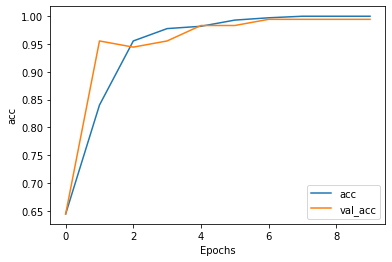

In [0]:
plot_graphs(history, 'acc')

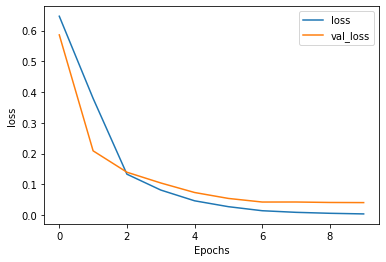

In [0]:
plot_graphs(history, 'loss')

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 128)


##Test Model

In [0]:
tests = ['钓鱼的小橘猫很多时候，我能感觉到自己没有未来，就像一切都会在下一秒结束，包括生命',
         '我会在二十八岁结束了这潦草的一生对吧',
         '最爱灼灼华年我真的好想死啊',
         '我好烦。今天怎么还没死。',
         '#2017四川公安舟船演练#乘风破浪，奋勇争先，为了肩头的使命与担当，为了警察的职责与荣耀。[加油] 四川公安的微博视频 ']
sentences = []
for s in tests:
  sentences.append(jieba_tokenizer(s))
sequence = tokenizer.texts_to_sequences(sentences)
print(sequence)

r = model.predict(pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH, truncating='post'))
print(r)
for u, v in list(zip(sentences, r)):
    rating = 'Good' if v[0] < 0.5 else 'Bad'
    print(f'{u} → {rating}')

[[1, 2, 1, 1437, 463, 129, 3, 50, 213, 23, 27, 58, 257, 10, 145, 227, 11, 22, 6, 112, 1146, 82, 1101, 376], [805, 6, 1, 82, 4, 26, 1, 2, 546, 53], [54, 57, 1, 1449, 47, 3, 67, 19, 13, 14], [3, 1, 63, 110, 46, 2813], [75, 356, 473, 4773, 4774, 4775, 4776, 302, 4777, 2, 1466, 39, 1467, 302, 512, 2, 4778, 39, 624, 277, 356, 473, 2, 76, 17]]
[[0.9852321 ]
 [0.98001593]
 [0.98846567]
 [0.95916885]
 [0.00916184]]
钓鱼 的 小橘 猫 很多 时候 我 能 感觉 到 自己 没有 未来 就 像 一切 都 会 在 下 一秒 结束 包括 生命 → Bad
我会 在 二十八岁 结束 了 这 潦草 的 一生 对 → Bad
最 爱 灼灼 华 年 我 真的 好 想 死 → Bad
我 好烦 今天 怎么 还 没死 → Bad
2017 四川 公安 舟船 演练 乘风破浪 奋勇争先 为了 肩头 的 使命 与 担当 为了 警察 的 职责 与 荣耀 加油 四川 公安 的 微博 视频 → Good


##Visualize embeddings

In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')
#visit website: projector.tensorflow.org